In [6]:
# pip install keras-self-attention
import os, time, gc, sys, io, pdb
import datetime, keras, pickle
import warnings, random, statistics
#
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axes_grid1 import host_subplot
import statistics as sts
#
from scipy import stats
from pandas import Series
from matplotlib.ticker import MultipleLocator, ScalarFormatter
#
# tf.logging.set_verbosity(tf.logging.ERROR)
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [18]:
import os
import pickle

tmod = 'stcklstm' #stcklstm lstm attlstm

def load_preprocessed_data(path, win, multi=False):
        '''
        Returns the preprocessed data as a list of objects
        
        Arguments:
        path - path to the preprocessed data
        win - window size
        multi - boolean value to indicate if the data is multivariate or not
        '''

        if multi == False:
            fdat = 'D:/Escritorio/TFG/Finance-AI/DataProcessed/model-'+tmod+'-output.pkl'

        else:
            fdat = 'D:/Escritorio/TFG/Finance-AI/DataProcessed/model-'+tmod+'-output.pkl'

        with (open(fdat, "rb")) as openfile:
            while True:
                try:
                    path      = pickle.load(openfile)
                    fdat     = pickle.load(openfile)
                    lahead    = pickle.load(openfile)
                    lpar      =pickle.load(openfile)
                    stock_list= pickle.load(openfile)
                    tot_res   = pickle.load(openfile)
                    df_dict   = tot_res['INP']
                except EOFError:
                    break
        return path, fdat, lahead, lpar, stock_list, tot_res, df_dict

path, fdat, lahead, lpar, stock_list, tot_res, df_dict = load_preprocessed_data("../../DataProcessed", 22, multi=True)

In [19]:
def plot_res(DY,msep,msey,stck,model,path,itr=0,wdth=10,hght=8):
    # Plotting results clue: https://stackoverflow.com/questions/9103166/multiple-axis-in-matplotlib-with-different-scales
    plt.figure(figsize=[wdth,hght])
    host = host_subplot(111, axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)
    par1 = host.twinx()
    par2 = host.twinx()
    #
    p1, = host.plot(DY.index,DY.Y_real,label="Real Values")
    p2, = par1.plot(DY.index,DY.Y_predicted,label="LSTM predicted")
    p3, = par2.plot(DY.index,DY.Y_yesterday,label="From Yesterday")
    host.legend(title=('Stock: '+stck, 'Model: ' +model))
    host.set_xlabel("Date",fontsize='x-large',fontweight='bold')
    host.set_ylabel("Real Stock Values",fontsize='x-large',fontweight='bold')
    par1.set_ylabel("Predictions", fontsize='large',fontweight='bold')

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())

    plt.text(.01, .01, 'MSE Predicted=' + str(round(msep,3)), ha='left', \
             va='bottom', color=p2.get_color(), fontsize=16, transform=host.transAxes)
    plt.text(.01, .05, 'MSE Yesterday=' + str(round(msey,3)), color=p3.get_color(),\
        fontsize=16, ha='left', va='bottom', transform=host.transAxes)
    # host.tick_params('x', labelrotation=45)
    #
    # plt.draw()
    if len(path) == 0:
        plt.show()
    else:
        figfich = path + '{}-{}-{:02}.png'.format(model,stck,itr)
        plt.savefig(figfich)
    return(None)

def plot_perf(res,stocks,ahead,path,wdth=10,hght=8):
    model = res['MODEL']
    lstd  = {}
    yval  = {}
    for ix in stocks:
        # vmed = statistics.mean(res1[ix][ahead]['MSEP'])
        # vstd = statistics.stdev(res1[ix][ahead]['MSEP'])
        lstd[ix] = res[ix][ahead]['MSEP']
        yval[ix] = res[ix][ahead]['MSEY'][0]
    #
    h  = list(range(len(lstd)))
    bp = np.array(list(lstd.values()))
    plt.figure(figsize=[wdth,hght])
    fig, ax = plt.subplots()
    ax.boxplot(bp.T, positions=h, showmeans=True, manage_ticks=False)
    ax.plot(h,yval.values(),'--ko', c='red',label='Yesterday')
    ax.set_xticks(h,list(lstd.keys()), rotation='vertical')
    # ax.set_xticklabels(list(lstd.keys()), rotation='vertical')
    plt.gca().set_xlabel('Stocks')
    plt.gca().set_ylabel('MSE of the 10 simulations')
    ax.legend()
    # plt.yscale("log") 
    if len(path) == 0:
        plt.show()
    else:
        figfich = path + 'perf-{}_{:02}.png'.format(model,ahead)
        plt.savefig(figfich)
    return(None)

In [20]:
tot_res['OUT_MODEL']['MODEL']

'lstm'

In [21]:
res1 = tot_res['OUT_MODEL']
mdl  = 'lstm'
stck = 'AAPL'
ahead= 1
itr  = 9
DYs  = res1[stck][ahead]['DY']
DY   = DYs.loc[itr]

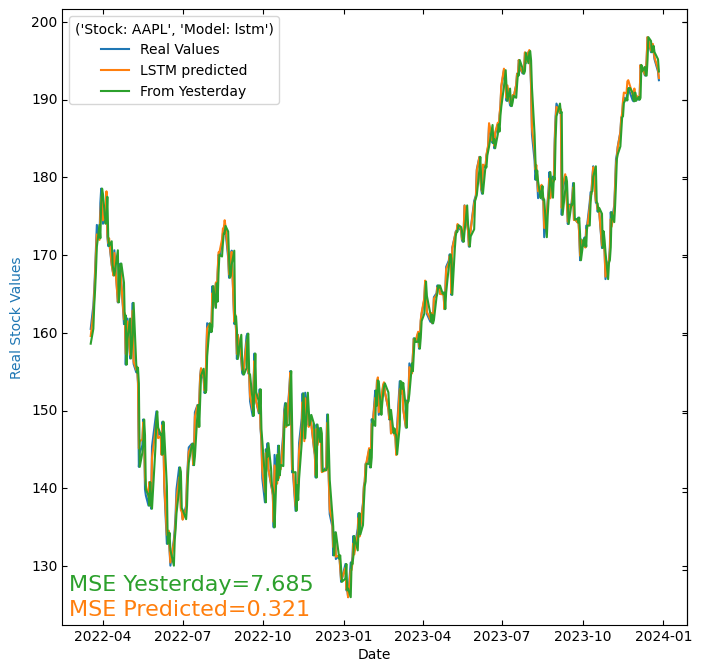

In [22]:
path = 'D:\Escritorio\TFG\Finance-AI\Figures/'
msep = res1[stck][ahead]['MSEP'][itr]
msey = res1[stck][ahead]['MSEY'][itr]
plot_res(DY,msep,msey,stck,mdl,path,itr)

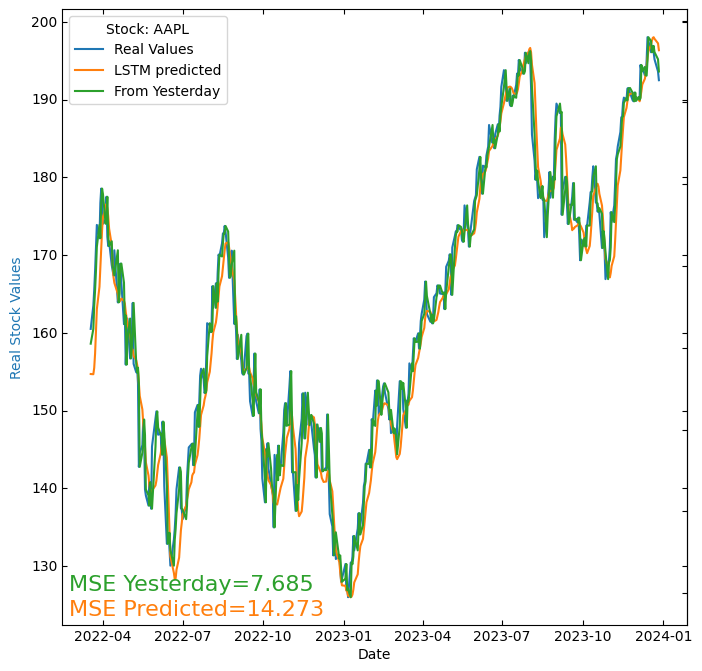

In [12]:
res1 = tot_res['OUT_MODEL']
mdl  = 'stcklstm'
stck = 'AAPL'
ahead= 1
itr  = 9
DYs  = res1[stck][ahead]['DY']
DY   = DYs.loc[itr]

path = 'D:\Escritorio\TFG\Finance-AI\Figures/'
msep = res1[stck][ahead]['MSEP'][itr]
msey = res1[stck][ahead]['MSEY'][itr]
plot_res(DY,msep,msey,stck,mdl,path,itr)

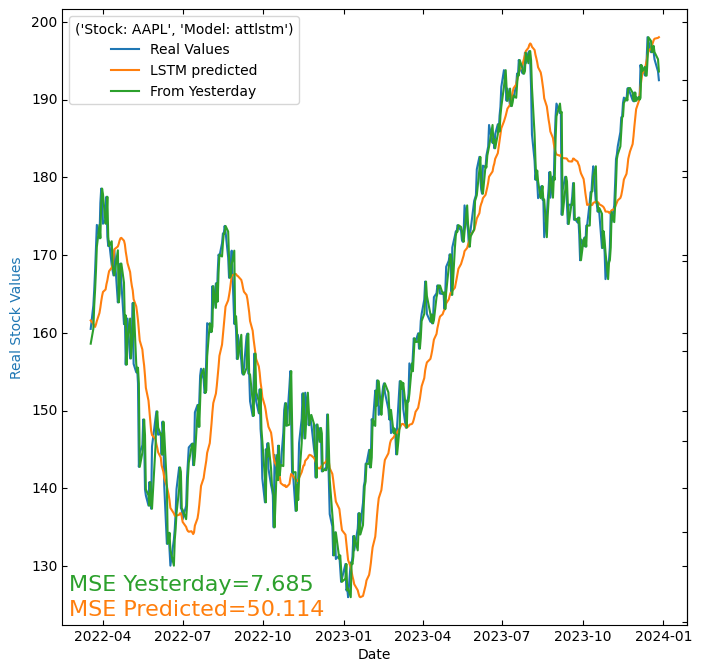

In [17]:
res1 = tot_res['OUT_MODEL']
mdl  = 'attlstm'
stck = 'AAPL'
ahead= 1
itr  = 9
DYs  = res1[stck][ahead]['DY']
DY   = DYs.loc[itr]

path = 'D:\Escritorio\TFG\Finance-AI\Figures/'
msep = res1[stck][ahead]['MSEP'][itr]
msey = res1[stck][ahead]['MSEY'][itr]
plot_res(DY,msep,msey,stck,mdl,path,itr)